In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
df = pd.read_csv('../data/churn.csv')

In [125]:
df.shape

(7043, 21)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [127]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [128]:
print(f'Churn Count:\n{df['Churn'].value_counts()}\n')
print(f'Churn Percentage:\n{df['Churn'].value_counts(normalize= True)}')

Churn Count:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn Percentage:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


- Around 27% of the customers in the dataset did churn.
- That leaves us with a pretty unbalanced dataset.

In [129]:
#Checking for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- TotalCharges was shown as an object Dtype by the dataframe information. However, there are no missing values. Therefore it might be a data import issue or the data has some empty strings that pandas can't detect.

In [131]:
#Convert TotalCharges into numerical values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors= 'coerce')

In [132]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [133]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


- After changing the data of the TotalCharges column to numerical data, we can confirm that the missing values were empty strings as the errors parameter set at 'coerce' returns invalid parsing as NaN values. 

- Now we know that there are 11 missing values under TotalCharges that will need to be taken of.

Text(0.5, 1.0, 'Churn vs Non-Churn Count')

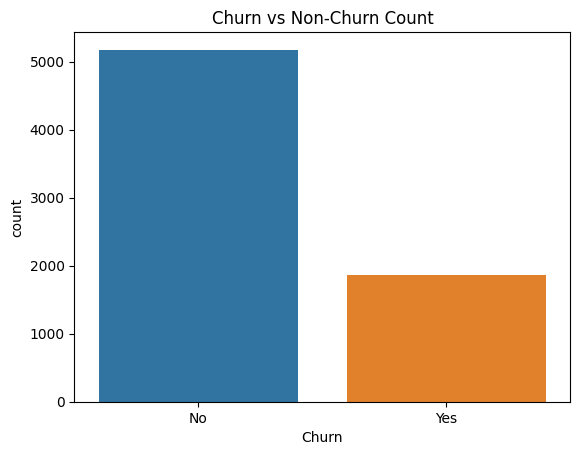

In [159]:
sns.countplot(df, x= 'Churn', hue= 'Churn')
plt.title('Churn vs Non-Churn Count')

Text(0.5, 1.0, 'Churn by Contract Type')

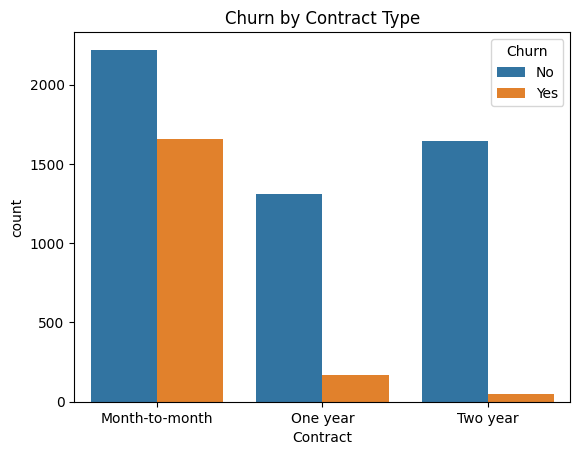

In [135]:
sns.countplot(data= df, x= 'Contract', hue= 'Churn')
plt.title('Churn by Contract Type')

Text(0.5, 1.0, 'Monthly Charges vs Churn')

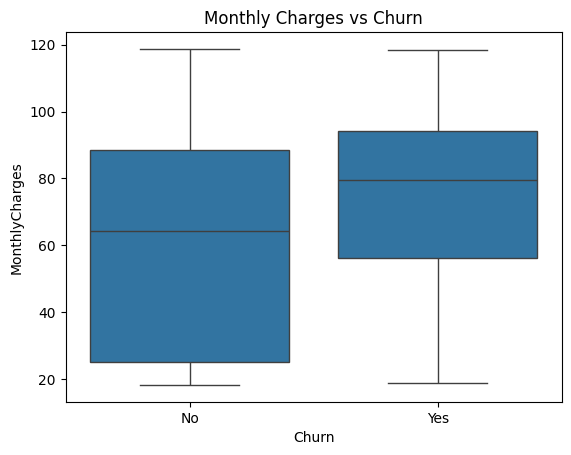

In [138]:
sns.boxplot(data= df, x= 'Churn', y= 'MonthlyCharges')
plt.title('Monthly Charges vs Churn')

Text(0.5, 1.0, 'Tenure Distribution by Churn')

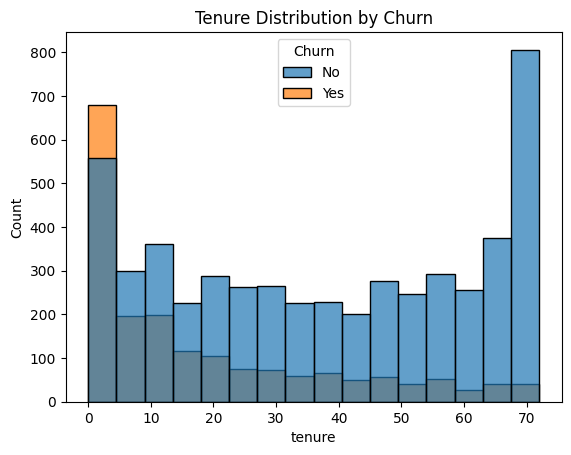

In [157]:
sns.histplot(data= df, x= 'tenure', hue= 'Churn', alpha= 0.7)
plt.title('Tenure Distribution by Churn')

Key Insight:

- The dataset shows a class imbalance, with over 5,000 customers who did not churn and just over 2,000 who churned. This imbalance should be accounted for during model training and evaluation.

- Analysis of contract types reveals that customers on month-to-month contracts churn at a much higher rate than those on one- or two-year contracts, suggesting lower customer commitment.

- A box plot comparison of monthly charges shows that customers who churn generally pay higher monthly fees. The median monthly charge for churned customers is noticeably higher, indicating a potential relationship between service cost and churn.

- Tenure analysis indicates that customers with lower tenure are significantly more likely to churn, emphasizing the importance of customer experience during the early lifecycle.